# Topics in Applied Optimization (IIIT, Hyderabad, India)

# Jupyter Notebook Assignment-1

### Instructor: Dr. Pawan Kumar (IIIT, H) (https://faculty.iiit.ac.in/~pawan.kumar/)

If you are not familiar with Jupyter notebook, before proceeding further, please go and watch this video:

https://www.youtube.com/watch?v=HW29067qVWk

## Regarding assignments

### Deadline: 13 October 2023

- all the assignment is to be done in this notbook itself
- any proof etc can be done on paper, and image is to be inserted in this notebook
- save this notebook with your roll number and upload it in moodle
- basic familiarity with python is required, brush up if necessary
- you are not allowed to use any existing library for gradient methods; this defeats the purpose of this assignment
- sample output is in the zip file of assignment
- if there are any doubt, then raise it in course moodle site, it may help others
- if you find typo, raise this issue in moodle promptly!
- please avoid copying from others, there may be oral exam to test your knowledge


# Implementation of Recommender System Using Latent Factor Model in Python

Please refer to the class slides for more detail. Also, for full detail, please refer the following main reference:

**[1] Y. Koren, R. Bell, and C. Volinsky, Matrix Factorization Techniques for Recommender Systems, Computer Archive, Volume 42, Issue 8, 2009**

We first load the necessary libraries:

1. matplotlib: needed for plotting figures and
2. numpy needed for doing math


In [221]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Now we write the main functions

We write everything inside a class LF, which stands for latent factor. We need the following functions:

1. main
2. train
3. mse
4. sgd
5. predict
6. full_matrix


# Short Tutorial on Recommender Systems

Please see lecture slides for more detail.


## Latent Factor Model

In a recommender systems, we are given an incomplete ratings matrix say R. The $(i,j)$ entry of this matrix is denoted by $r_{ij}.$

- We believe that there are dependencies in the matrix, i.e., the matrix is low rank, hence it can be written as a product of low rank matrices.
- Even if the matrix is not strictly low rank, we believe that certain features are more important than others. In other words, if the ratings matrix were full, then after doing SVD, we get
  $$R = U S V^T$$
  some of the singular values were very small, hence the matrix can be approximated well with truncated SVD. Let us consider the first $k$ largest singular vectors, then the truncated SVD is
  $$R \approx U_k S_k V_k.$$
- See IPSC notes for more detail on how to compute SVD or truncated SVD
- For a recomendation problem, for example, movie recomendation or news recommendation or product recommendation, etc, we believe that certain latent features are most important and play a major role in ratings.
- For movie recommendation, for example, latent factors could be comedy, adventure, horror, etc. These features are called latent, because the given data, which is ratings matrix does not explicitely tells about these.
- For recommendation systems, we cannot do SVD, because the matrix $R$ is incomplete! Obviously, we cant treat the missing entries to be zero! Hence, instead of doing SVD, we will consider an error function that consider only the ratings that are given. Let us assume that the ratings matrix can be modelled as a latent factors, i.e., suppose that $$R = PQ, \quad P \in \mathbb{R}^{n \times k}, Q \in \mathbb{R}^{k \times n},$$ then the given rating $$r_{ij} = p_{i*}q_{*j},$$ where $p_{i*}$ denotes the $i$th row of $P,$ and $q_{*j}$ denotes the $j$th column of $Q.$


## Optimization Model

- As mentioned above, we cannot directly do SVD, however, we can indeed create a **loss function** as follows:
  $$\mathcal{L}(p_{1*}, p_{2*}, \dots p_{n*}, q_{*1}, q_{*2}, \dots, q_{*n}) = \sum_{(i,j) \in K} (r_{ij} - p_{i*}q_{*j}).$$
- Note above that we see loss function as a function the variables $p_{1*}, p_{2*}, \dots, p_{*n},$ which are row vectors of $P,$ and as the column vectors of $Q,$ which are $q_{*1}, q_{*2}, \dots, q_{*n}.$ This allows us to **vectorize**. Why vectorize?
- In machine learning the weights and their combinations with the given data creates a model. In this case, the model is $PQ.$ Since the $k,$ is a hyperparameter, it is likely that one may choose $P$ and $Q$ to have too many columns, i.e., too many weights are used, this will lead to a large model, and hence leading to **overfitting**.
  If you are not familiar with overfitting, then pause here, and see the video here:

https://www.youtube.com/watch?v=u73PU6Qwl1I

    - What did you learn from video?
    - What is termed as model?
    - What is the meaning of model being large?
    - What is the difference between linear and logistic regression?
    - What is underfitting?
    - What is a bias?
    - How do you characterize bias and variance using terms overfitting or underfitting?

- A well known way to avoid overfitting is to do regularizations, by penalizing **large model** size. Let us modify our loss function as follows:

  $$
  \mathcal{L}(\cdot) = \sum_{(i,j) \in K} (r_{ij} - p_{i*}q_{*j})^2 + \gamma/2 (\| P \|_F^2 + \| Q \|_F^2)

  $$ - We have added the term $\gamma/2(\| P \|_F^2 + \| Q \|_F^2).$ It is called **regularization term** - he parameter $\gamma$ is called the **regularization parameter** - High $\gamma$ would mean that we don't want big model size; this may help prevent overfitting
  $$

- Let $e_{ij}$ denote the error corresponding to each $(ij)$ term,
  $$e_{ij} = r_{ij} - \sum_{s=1}^k p_{is}q_{sj}$$
  then let us define the new error term $\tilde{e}$
  $$\tilde{e}_{ij} = e_{ij}^2 + \gamma/2 (\|P\|_F^2 + \| Q \|_F^2),$$
  that is,
  $$\tilde{e}_{ij} = (r_{ij} - \sum_{s=1}^k p_{is}q_{sj} )^2 + \gamma/2 (\|P\|_F^2 + \| Q \|_F^2)$$
- Note that $$\mathcal{L}(\cdot) = \sum_{(i,j) \in \mathcal{K}} \tilde{e}_{ij},$$
  where $\mathcal{K}$ is the set of all indices for which ratings $r_{ij}$ are available.


## Gradient Method Versus Stochastic Gradient Methods

Following notes are taken from
https://en.wikipedia.org/wiki/Stochastic_gradient_descent

For large dataset, $k$ and $n$ tend to be large, and computing gradient fully becomes too demanding. In machine learning or statistical estimation, we are usually required to find minimum of the loss functions of the form
$$Q(w) = 1/n \sum_{j=1}^n Q_j (w)$$
That is loss function as "additive" decomposition. In other words, the loss function is a sum of the loss function where the sum is over the data samples. If $n$ is large, then computing full gradient is computationally demanding. However, if we indeed decide to run the gradient method. Then we recall the following steps:

1. Take initial random weight (possibly random and normally distributed between 0 and 1): $w^0$
2. $w^{i+1} = w^i - \alpha \nabla Q(w^i), \quad i=0, \dots$

Here the gradient $\nabla Q$ is the full gradient in the sense that

$$
\begin{align}
\nabla Q(w) = \sum{i=1}^n \nabla{w}Q_i(w). \label{grad} \tag{1}
\end{align}
$$

Here
\begin{align}
\nabla_w Q_i (w) = \begin{bmatrix}
\dfrac{\partial Q_i (w)}{\partial w_1} \\
\dfrac{\partial Q_i (w)}{\partial w_1} \\
\vdots \\
\dfrac{\partial Q_i (w)}{\partial w_n} \\
\end{bmatrix} \label{grad2} \tag{2}
\end{align}

### Stochastic gradient descent method

Stochastic gradient merthod, in short, SGD is a method (not necessarily descent due to stochasticity, but in expectation is usually is a descent), where the gradient is computed partially. For example, instead of summing for all $i=1...n,$ we can take a random sample, say $j_1,$ and do the update only for this sample as follows:
$$\nabla Q(w) = \nabla_{w}Q_{j_1}(w),$$
that is we have picked just one of the term i.e., $j_1$th term from \eqref{grad}.
Then the SGD update is:
$$w^{i+1} = w^i - \alpha \nabla Q_{j_1}(w^i), \quad i=0, \dots$$
Note that we could have taken few more terms in the sum, and would have updated for a batch. This is called, batched stochastic gradient descent.
It sounds incorrect, isnt it? Why such method may converge? With some basic assumption on the loss function, we can prove some convergence in expectance. More on convergence theory in class!


$\color{red}{\text{Question-0:}}$ Compute the full gradient of the loss function for recommendation system

$\color{red}{\text{Answer:}}$

Given the loss function for the recommendation system:

$$
\mathcal{L}(p, q) = e_{ij}^2 + \gamma (||p||^2 + ||q||^2)
$$

where the error term $ e\_{ij} $ is given by:

$$
e_{ij} = r_{ij} - p^T q
$$

The gradient with respect to the latent factors $ p $ and $ q $ are:

$$
\nabla_p \mathcal{L} = -2 e_{ij} q + 2\gamma p
$$

$$
\nabla_q \mathcal{L} = -2 e_{ij} p + 2\gamma q
$$

Here, $ \nabla_p \mathcal{L} $ represents the gradient of the loss function with respect to $ p $ and $ \nabla_q \mathcal{L} $ represents the gradient with respect to $ q $. These gradients guide the updates to the latent factors during the optimization process.


In the following, we derive a stochastic gradient for the loss function for recommender loss.


## Gradient Method for Optimization Problem

- We want to use gradient method to minimize the error. An update in gradient method is given as follows
  $$w^{i+1} = w^i - \nabla \mathcal{L}(w^i)$$
- To use gradient method, we need to compute gradient. If we see $\mathcal{L}$ as a function of $p_{ik}'$s and $q_{ki}'$s, then
  $$\dfrac{\partial \mathcal{L}}{\partial p_{is}} = 2e_{is} \dfrac{\partial e_{is}}{\partial p_{is}} + \gamma p_{is} = -2e_{is} q_{sj} + \gamma p_{is}$$
  Similarly,
  $$\dfrac{\partial \mathcal{L}}{\partial q_{sj}} = 2e_{sj} \dfrac{\partial e_{sj}}{\partial q_{sj}}+\gamma q_{sj} = -2e_{sj}p_{js} + \gamma q_{sj},$$
- The gradient vector $\nabla \mathcal{L}$ is given by
  $$\nabla \mathcal{L} = \left(\dfrac{\partial \mathcal{L}}{\partial p_{11}}, \dots, \dfrac{\partial \mathcal{L}}{\partial p_{nk}}, \dfrac{\partial \mathcal{L}}{\partial q_{11}}, \dots, \dfrac{\partial \mathcal{L}}{\partial p_{kn}} \right)$$
- The weights $p_{is}$ can be updated as
  $$p_{is} = p_{is} + \alpha (2e_{ij} q_{sj} - \gamma p_{is}) $$
- The weights $p_{sj}$ can be updated as
  $$q_{sj} = q_{sj} + \alpha (2e_{ij} p_{js} - \gamma q_{sj}) $$
- We can vectorize $s.$ Finally, the vectorized form of the update looks like:
  $$(p_{i+1*}, q_{*j+1})^T = (p_{i*}, q_{*j})^T + \alpha ((2e_{ij} q_{*j} - \gamma p_{i*}), (2e_{ij} p_{j*} - \gamma q_{*j}))^T  $$
- The error at $(p_{i*}, q_{*j})^T$ nedded above can be computed by $$e_{ij} =  r_{ij} - \text{prediction at}~ (i,j) $$
  Here prediction at $(i,j)$ can be computed by making a call to predict() function below.


$\color{red}{\text{Question-1:}}$ Why the error is computed this way?

$\color{red}{\text{Answer:}}$ Either use latex (preferred) or write it on paper, take pic, and insert it here. See the video on jupyter above on how to paste images.

The error $e_{ij}$ is computed as the difference between the actual rating $ r\_{ij} $ and the predicted rating for user i and item j. In mathematical terms:

$$

e_{ij} = r_{ij} - \text{{prediction at}}~ (i,j)


$$

The rationale for this computation is:

1. **Objective of Matrix Factorization:** The primary goal of matrix factorization in recommender systems is to approximate the original ratings matrix as closely as possible. By decomposing this matrix into two lower-dimensional matrices (which represent the latent factors for users and items), the predicted rating is obtained as the dot product of the user and item latent vectors.

2. **Quantifying Deviation:** To gauge the accuracy of our matrix factorization, we need a measure to quantify the deviation between our predictions and the actual ratings. This deviation (or error) for a user-item pair is the difference between its actual rating and the predicted one.

3. **Optimization:** During the optimization phase (like gradient descent), the goal is to minimize the cumulative error across all user-item pairs. Defining the error as the difference between actual and predicted ratings ensures the optimization process tweaks the latent factors to make the predicted ratings converge to the actual ones.

In essence, this method of computing error offers a direct measure of prediction accuracy, crucial for optimizing latent factors in matrix factorization.


$\color{red}{\text{Question-2:}}$ Are the updates for $p_{i*}$ and $q_{*j}$ stochastic? Justify.

$\color{red}{\text{Answer:}}$ Write your answer here.
Yes, the updates for $p_{i*}$ and $q_{*j}$ in the `sgd` function are stochastic. The justification is as follows:

1. **Definition of Stochastic Gradient Descent (SGD):** In SGD, rather than using the entire dataset to compute the gradient and update the weights (as in batch gradient descent), we update the weights based on the gradient computed from a single data point (or a small batch of data points).

2. **Updates in the `sgd` method:** In the provided code for the `sgd` method, we iterate over the samples (i.e., the known ratings in the ratings matrix). For each sample, we:

   - Compute the prediction and the error for that specific user-item pair.
   - Update the user and item latent factors based on this error.

   This means we're using a single data point (rating) at a time to compute the gradient and update the latent factors, which is characteristic of SGD.

3. **Advantages of Stochastic Updates:** Using stochastic updates can help escape local minima and can lead to faster convergence, especially when the dataset is large. However, the path to convergence can be noisier compared to batch gradient descent.

In conclusion, the updates for $p_{i*}$ and $q_{*j}$ in the `sgd` method are stochastic because they are based on individual samples rather than the entire dataset.


# Adding Bias

It is often observed in practice that adding a bias term helps. Let us add the bias term $b$ to the prediction function. The bias term is computed as the mean of the ratings matrix. See the predict function below to see how bias is added.


$\color{red}{\text{Question-2b:}}$ Read the main reference paper and justify why bias is added. Note in this notebook we add global bias. Which other bias term was suggested in the paper?


$\color{red}{\text{Answer:}}$

1. **Global Bias $ \mu $**:
   This is the overall average rating across all items and users. It represents a general baseline rating that can be expected without knowing anything about a specific user or item.

2. **User Bias $ b_u $**:
   This represents the deviation of a particular user from the average. For instance, some users might generally rate movies more critically than others. This bias term captures such tendencies.

3. **Item Bias $ b_i $**:
   Similarly, this captures the deviation of a particular item from the average. Some items might be universally acclaimed and tend to receive higher ratings, while others might be polarizing or generally not as well-received.


In [222]:
class LF():
    def __init__(self, R, K, alpha, gamma, iterations, bias=True):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.gamma = gamma
        self.iterations = iterations
        self.bias = bias

    def train(self, tp=0):
        self.P = np.random.normal(
            scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(
            scale=1./self.K, size=(self.num_items, self.K))

        self.b = np.mean(self.R[np.where(self.R != 0)]) if self.bias else 0

        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            if tp == 0:
                self.sgd()
            else:
                self.gd_All()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 10 == 0:
                if tp == 0:
                    print("SGD Iteration: %d ; error = %.4f" % (i+1, mse))
                else:
                    print("GD Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.predict(i, j)
            e = (r - prediction)
            # ic(self.P[i, :].shape)
            # ic(self.Q[j, :].shape)
            # ic(e.shape)

            # ic(self.b.shape)
            self.P[i, :] += self.alpha * \
                (e * self.Q[j, :] - self.gamma * self.P[i, :])
            self.Q[j, :] += self.alpha * \
                (e * self.P[i, :] - self.gamma * self.Q[j, :])

    def gd_All(self):
        # Initialize gradients for P and Q
        grad_P = np.zeros((self.num_users, self.K))
        grad_Q = np.zeros((self.num_items, self.K))

        predictions = self.full_matrix()
        observed_ratings_mask = (self.R > 0)

        errors = (self.R - predictions) * observed_ratings_mask

        # Compute gradients for P and Q using vectorized operations
        for j in range(self.num_items):
            grad_P += -2 * \
                np.outer(errors[:, j], self.Q[j, :]) + 2 * self.gamma * self.P

        for i in range(self.num_users):
            grad_Q += -2 * \
                np.outer(errors[i, :], self.P[i, :]) + 2 * self.gamma * self.Q

        # Update user and item latent feature matrices using the computed gradients
        self.P -= self.alpha * grad_P
        self.Q -= self.alpha * grad_Q

    def predict(self, i, j):
        return self.b + self.P[i, :].dot(self.Q[j, :].T)

    def full_matrix(self):
        return self.b + self.P.dot(self.Q.T)

In [223]:
R = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])
# R = np.array([
#     [5, 3, 0, 5],
#     [4, 0, 0, 5],
#     [1, 1, 0, 5]
# ])
lf = LF(R, K=2, alpha=0.1, gamma=0.01, iterations=100)
training_process = lf.train()
print()
print("P x Q:")
print(lf.full_matrix())
print()
print("Global bias:")
print(lf.b)
print()

SGD Iteration: 10 ; error = 0.6484
SGD Iteration: 20 ; error = 0.3731
SGD Iteration: 30 ; error = 0.3183
SGD Iteration: 40 ; error = 0.2800
SGD Iteration: 50 ; error = 0.2364
SGD Iteration: 60 ; error = 0.2137
SGD Iteration: 70 ; error = 0.1789
SGD Iteration: 80 ; error = 0.1581
SGD Iteration: 90 ; error = 0.1387
SGD Iteration: 100 ; error = 0.1214

P x Q:
[[5.00546894 3.03042334 4.10709696 1.05744715]
 [4.02608956 4.15162536 1.92687316 1.03754465]
 [1.03425115 1.05195544 3.68558694 5.0407047 ]
 [1.03609022 2.6975831  1.56360073 4.01444732]
 [2.63758055 0.97696814 4.98319579 3.97674361]]

Global bias:
2.769230769230769



# More questions


$\color{red}{\text{Question-3:}}$ Implement the full gradient descent method

$\color{red}{\text{Answer:}}$ Complete gd function above


$\color{red}{\text{Question-4:}}$ Vectorize the updates of p and q, by vectorizing s (detailed above)

$\color{red}{\text{Answer:}}$ Fill the TODO in code above


### Using the code below, answer the following:


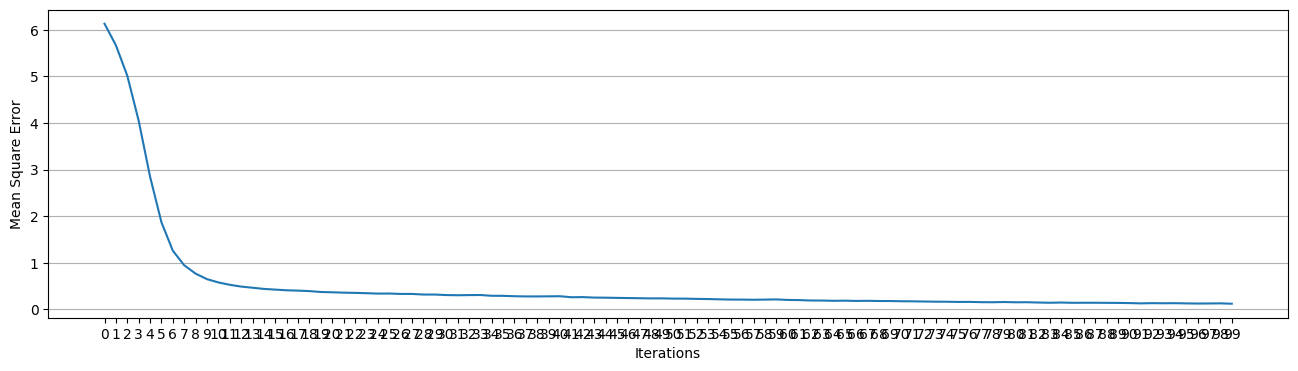

In [224]:
x = [x for x, y in training_process]
y = [y for x, y in training_process]
plt.figure(figsize=((16, 4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.xlabel("Iterations")
plt.ylabel("Mean Square Error")
plt.grid(axis="y")

Alpha changed to 0.03 instead of 1


$\color{red}{\text{Question-5:}}$ Plot the MSE versus iterations for $\alpha=1, \gamma=0.01$ and 100 iterations of SGD

$\color{red}{\text{Answer:}}$ Put your figure here


SGD Iteration: 10 ; error = 5.0232
SGD Iteration: 20 ; error = 4.2578
SGD Iteration: 30 ; error = 3.1237
SGD Iteration: 40 ; error = 1.6470
SGD Iteration: 50 ; error = 1.0023
SGD Iteration: 60 ; error = 0.7219
SGD Iteration: 70 ; error = 0.5666
SGD Iteration: 80 ; error = 0.4737
SGD Iteration: 90 ; error = 0.4141
SGD Iteration: 100 ; error = 0.3740

P x Q:
[[4.97341368 3.10705571 5.35786737 1.07353577]
 [4.09992918 3.73111594 3.8015305  1.11155863]
 [1.1283015  1.16720348 1.78736247 5.16122643]
 [0.96379477 2.76112068 0.46088967 3.93350244]
 [3.45621337 0.90628382 4.95365921 3.88701184]]

Global bias:
2.769230769230769



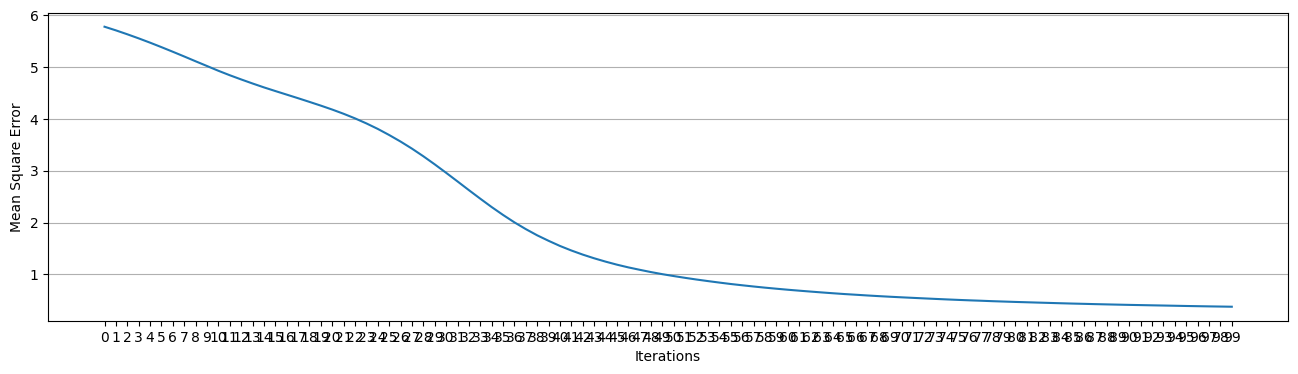

In [225]:
import matplotlib.pyplot as plt


def train_and_plot(R, K=2, alpha=0.1, gamma=0.01, iterations=100, bias=True, tp=0):
    lf = LF(R, K=K, alpha=alpha, gamma=gamma, iterations=iterations, bias=bias)
    training_process = lf.train(tp=tp)

    print("\nP x Q:")
    print(lf.full_matrix())
    print("\nGlobal bias:")
    print(lf.b)
    print()

    x = [x for x, y in training_process]
    y = [y for x, y in training_process]
    plt.figure(figsize=((16, 4)))
    plt.plot(x, y)
    plt.xticks(x, x)
    plt.xlabel("Iterations")
    plt.ylabel("Mean Square Error")
    plt.grid(axis="y")
    plt.show()


train_and_plot(R, K=2, alpha=0.03, gamma=0.01, iterations=100)

$\color{red}{\text{Question-6:}}$ Show the plot for 50 iterations, $\alpha=1, \gamma=0.01$ of SGD without bias, i.e., $b=0$

$\color{red}{\text{Answer:}}$ Paste your output and figures here or below this cell


SGD Iteration: 10 ; error = 7.8807
SGD Iteration: 20 ; error = 5.6092
SGD Iteration: 30 ; error = 1.6162
SGD Iteration: 40 ; error = 0.7012
SGD Iteration: 50 ; error = 0.5341

P x Q:
[[5.04502398 2.84097609 4.18053802 1.00101099]
 [3.94218271 2.22444575 3.44365629 0.99691646]
 [1.11936743 0.72993806 4.83894777 4.96762678]
 [0.95200517 0.61581807 3.91974434 3.98744744]
 [2.32284563 1.3832067  4.87640162 4.04192562]]

Global bias:
0



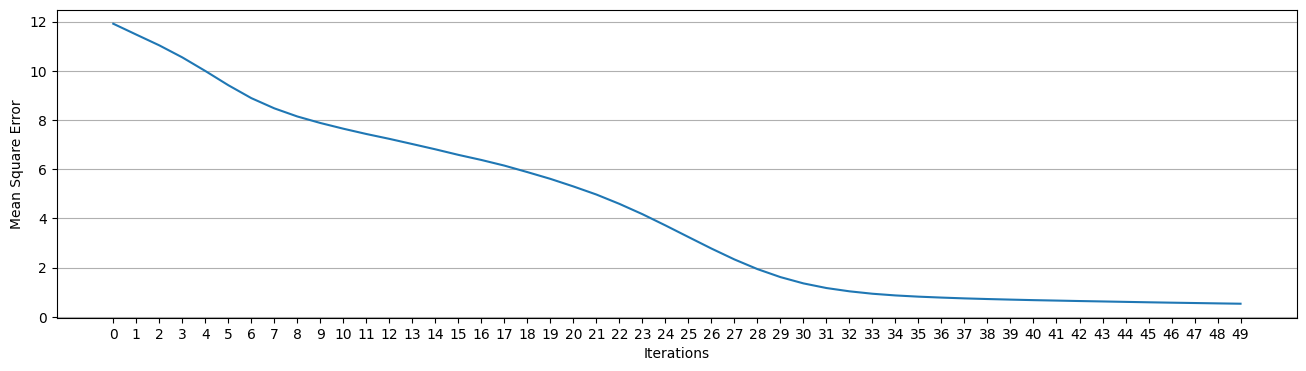

In [226]:
train_and_plot(R, K=2, alpha=0.03, gamma=0.01, iterations=50, bias=False)

$\color{red}{\text{Question-7:}}$ Repeat above with bias

$\color{red}{\text{Answer:}}$ Paste your output and figures here or below this cell


SGD Iteration: 10 ; error = 4.4889
SGD Iteration: 20 ; error = 1.9083
SGD Iteration: 30 ; error = 1.5225
SGD Iteration: 40 ; error = 1.4075
SGD Iteration: 50 ; error = 1.3072

P x Q:
[[4.69947276 3.61138507 0.80400978 1.2122127 ]
 [4.37282545 3.4629262  1.13586055 1.4785197 ]
 [0.84599682 1.02697118 4.61854565 4.74888824]
 [1.21484605 1.74787116 4.3104518  4.18581123]
 [0.71289862 1.53504088 4.82223799 4.58777976]]

Global bias:
2.769230769230769



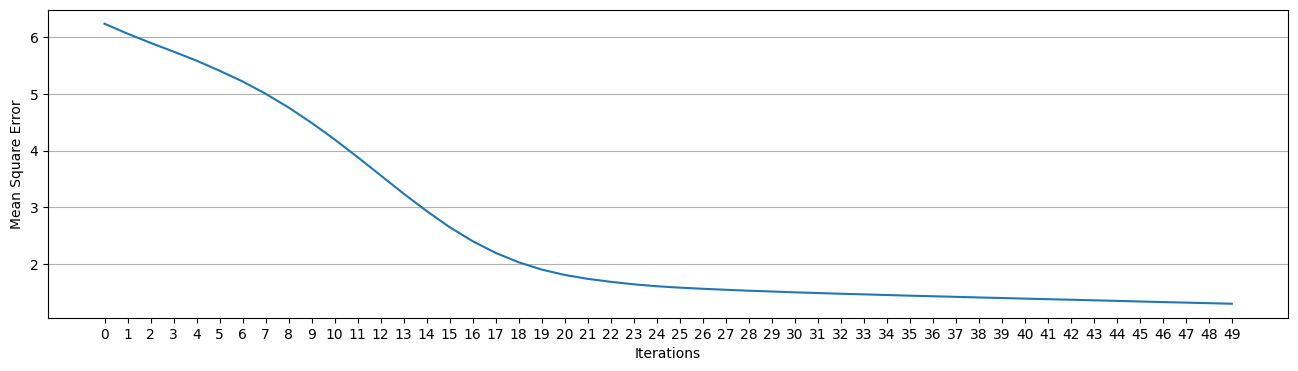

In [227]:
train_and_plot(R, K=2, alpha=0.03, gamma=0.01, iterations=50, bias=True)

$\color{red}{\text{Question-8:}}$ Show plots with values of regularization parameters to be 1, 0.1, 0.01, 0.001 and for 50 iterations, and $\alpha=1, \gamma=0.01$

$\color{red}{\text{Answer:}}$ Paste all your plots here or below this cell.


Gamma: 0.001
SGD Iteration: 10 ; error = 3.0744
SGD Iteration: 20 ; error = 1.8016
SGD Iteration: 30 ; error = 1.2703
SGD Iteration: 40 ; error = 0.9764
SGD Iteration: 50 ; error = 0.7358

P x Q:
[[4.82418149 3.29227507 0.90128263 1.01523447]
 [4.17745083 4.07173361 0.89305709 1.2638345 ]
 [0.86519337 1.0406547  5.28544742 4.79420659]
 [1.11822751 2.47435025 4.1908444  4.13815364]
 [1.29130544 1.19670686 4.86806005 4.41520371]]

Global bias:
2.769230769230769



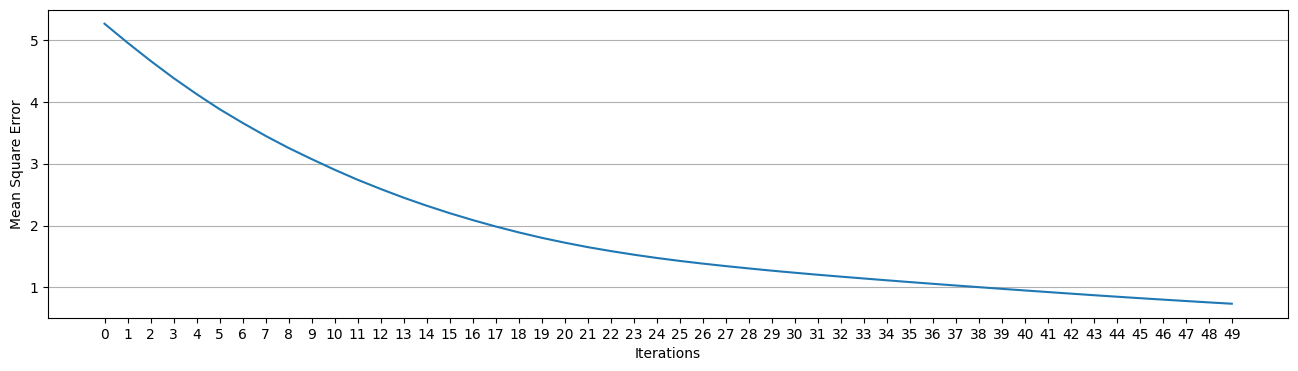

Gamma: 0.01
SGD Iteration: 10 ; error = 4.7019
SGD Iteration: 20 ; error = 2.7859
SGD Iteration: 30 ; error = 1.9301
SGD Iteration: 40 ; error = 1.3822
SGD Iteration: 50 ; error = 1.1086

P x Q:
[[4.52431722 3.64386719 1.58951298 0.95560275]
 [4.06069372 3.02129017 2.17356512 1.05546127]
 [0.59187141 1.37693712 4.44654338 4.72165093]
 [1.12426987 1.53382081 4.16412594 4.06646784]
 [0.68058247 1.02332589 4.66370649 4.24466242]]

Global bias:
2.769230769230769



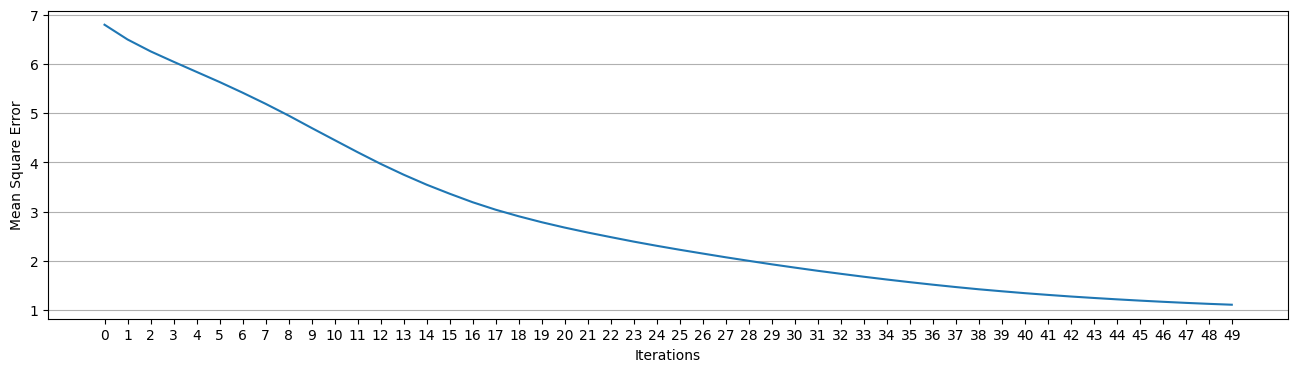

Gamma: 0.1
SGD Iteration: 10 ; error = 4.5555
SGD Iteration: 20 ; error = 1.5921
SGD Iteration: 30 ; error = 0.9996
SGD Iteration: 40 ; error = 0.9058
SGD Iteration: 50 ; error = 0.8705

P x Q:
[[4.60963061 3.19598224 1.40596304 1.02268153]
 [4.1953945  3.40505813 1.44475835 1.38080078]
 [0.88956054 1.24373338 5.11880967 4.67801074]
 [1.36989994 1.71837621 4.44388388 4.18050621]
 [1.61030763 1.11612464 4.84383736 4.02781898]]

Global bias:
2.769230769230769



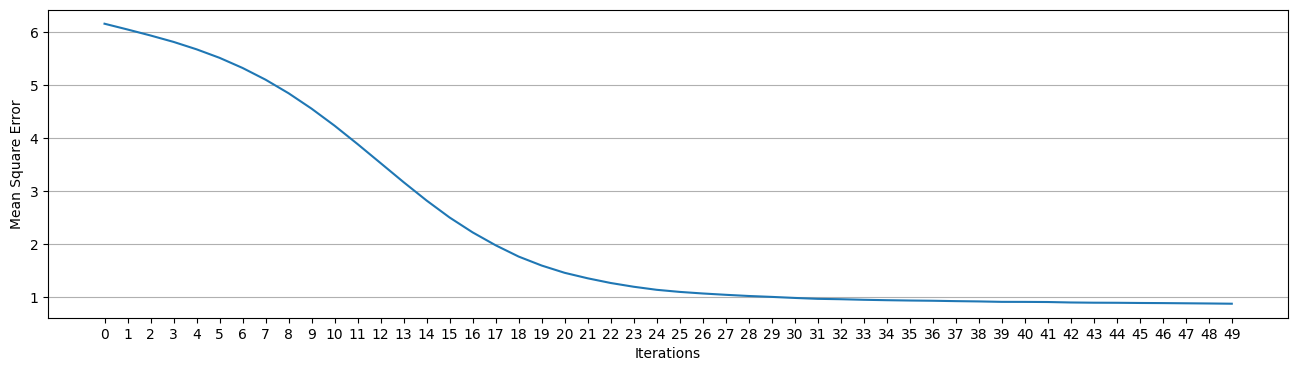

Gamma: 1
SGD Iteration: 10 ; error = 5.4414
SGD Iteration: 20 ; error = 4.9151
SGD Iteration: 30 ; error = 4.4690
SGD Iteration: 40 ; error = 4.2077
SGD Iteration: 50 ; error = 4.0660

P x Q:
[[3.38241663 3.21057944 2.22066793 2.18509928]
 [3.38466351 3.21901582 2.20141653 2.1804737 ]
 [2.00320089 2.19835028 3.503884   3.50607809]
 [2.16122164 2.33548247 3.30336666 3.34701884]
 [2.14098217 2.25622681 3.48502809 3.3898742 ]]

Global bias:
2.769230769230769



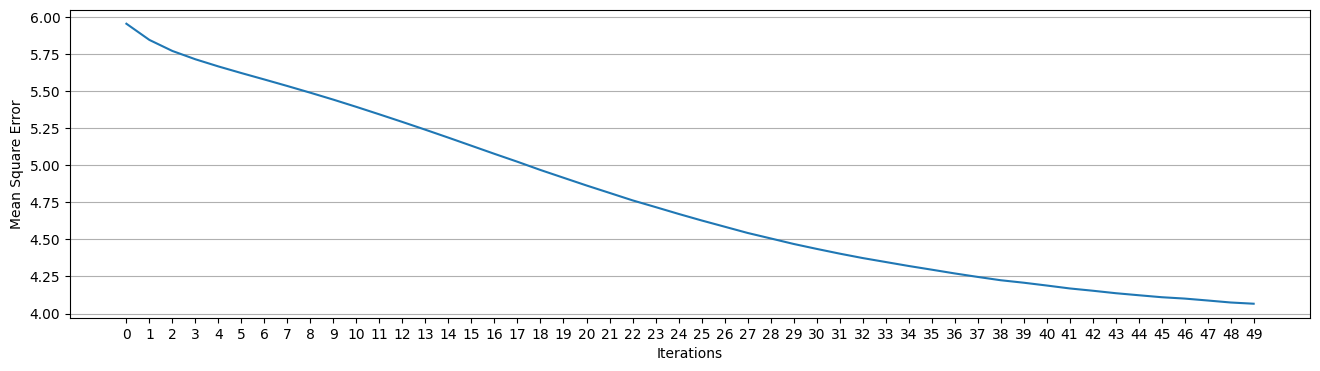

In [228]:
for gamma in [0.001, 0.01, 0.1, 1]:
    print(f"Gamma: {gamma}")
    train_and_plot(R, K=2, alpha=0.03, gamma=gamma, iterations=50, bias=True)

$\color{red}{\text{Question-9:}}$ Prove that the loss function is not convex. Is the loss function differentiable?

$\color{red}{\text{Answer:}}$ Write your answer here.
Given the loss function:
$$ \mathcal{L}(P, Q) = \sum*{(i,j) \in K} (r*{ij} - p*{i\*}q*{\*j})^2 + \frac{\gamma}{2} (\| P \|\_F^2 + \| Q \|\_F^2) $$

To compute the Hessian, we consider the derivatives with respect to a single element of $ P $ and a single element of $ Q $. Let's denote these as $ p*{ik} $ and $ q*{jl} $ respectively.

For a specific (i,j) pair, the loss becomes:
$$ \mathcal{L}_{ij}(p_{ik}, q*{jl}) = (r*{ij} - p*{i\*}q*{\*j})^2 $$

The Hessian is given by:

$$
H_{ij} = \begin{bmatrix}
\frac{\partial^2 \mathcal{L}_{ij}}{\partial p_{ik}^2} & \frac{\partial^2 \mathcal{L}_{ij}}{\partial p_{ik} \partial q_{jl}} \\
\frac{\partial^2 \mathcal{L}_{ij}}{\partial q_{jl} \partial p_{ik}} & \frac{\partial^2 \mathcal{L}_{ij}}{\partial q_{jl}^2}
\end{bmatrix}
$$

Computing each term:

1.  $ \frac{\partial^2 \mathcal{L}_{ij}}{\partial p_{ik}^2} = 2q\_{jk}^2 $
2.  $ \frac{\partial^2 \mathcal{L}_{ij}}{\partial p_{ik} \partial q*{jl}} = -2q*{jk} $ (if $ i = j $ and $ k = l $, otherwise 0)
3.  $ \frac{\partial^2 \mathcal{L}_{ij}}{\partial q_{jl} \partial p*{ik}} = -2p*{ik} $ (if $ i = j $ and $ k = l $, otherwise 0)
4.  $ \frac{\partial^2 \mathcal{L}_{ij}}{\partial q_{jl}^2} = 2p\_{ik}^2 $

For $ i = j $ and $ k = l $, the Hessian is:

$$
H_{ij} = \begin{bmatrix}
2q_{jk}^2 & -2q_{jk} \\
-2p_{ik} & 2p_{ik}^2
\end{bmatrix}
$$

To determine if the Hessian is positive semi-definite, we need to check its eigenvalues. For a 2x2 matrix:
$$ \lambda\_{1,2} = \frac{(a + d) \pm \sqrt{(a + d)^2 - 4(ad - bc)}}{2} $$

Where:
$$ a = 2q*{jk}^2 $$
$$ b = -2q*{jk} $$
$$ c = -2p*{ik} $$
$$ d = 2p*{ik}^2 $$

For the matrix to be positive semi-definite, both eigenvalues should be non-negative. However, for certain configurations of $ p*{ik} $ and $ q*{jk} $, the discriminant can be negative, suggesting that not both eigenvalues are positive, thereby implying the function is not convex.


## Bonus Question


$\color{red}{\text{Question-10:}}$ In the reference paper [1] above, additional bias terms are recommended, implement it

$\color{red}{\text{Answer:}}$ Put your modified function here or below this cell.


In [229]:
from icecream import ic


class LF_b():
    def __init__(self, R, K, alpha, gamma, iterations, bias=True):
        self.R = R
        self.num_users, self.num_items = R.shape
        print(self.num_users, self.num_items)
        self.K = K
        self.alpha = alpha
        self.gamma = gamma
        self.iterations = iterations
        self.bias = bias

    def train(self, tp=0):
        self.P = np.random.normal(
            scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(
            scale=1./self.K, size=(self.num_items, self.K))

        self.mu = np.mean(self.R[np.where(self.R != 0)])

        # This is a pseudo-code representation to correct the bias calculation.
        # Please ensure you have the relevant context and variables defined when you integrate this into your class.

        if self.bias:
            # User biases
            self.b_u = np.array([(np.mean(self.R[i][np.where(self.R[i, :] != 0)]) - self.mu)
                                if self.R[i][np.where(self.R[i, :] != 0)].size else 0 for i in range(self.num_users)])

            # Item biases
            self.b_i = np.array([(np.mean(self.R[:, i][np.where(self.R[:, i] != 0)]) - self.mu)
                                if self.R[:, i][np.where(self.R[:, i] != 0)].size else 0 for i in range(self.num_items)])

            # Combined bias matrix
            self.b = np.array([[self.b_u[j] + self.mu + self.b_i[i]
                                for i in range(self.num_items)] for j in range(self.num_users)])
        else:
            self.b = 0
            self.b_i = 0
            self.b_u = 0

        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            if tp == 0:
                self.sgd()
            else:
                self.gd_All()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 10 == 0:
                if tp == 0:
                    print("SGD Iteration: %d ; error = %.4f" % (i+1, mse))
                else:
                    print("GD Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.predict_all_bias(i, j)
            e = (r - prediction)

            self.P[i, :] += self.alpha * \
                (e * self.Q[j, :] - self.gamma * self.P[i, :])
            self.Q[j, :] += self.alpha * \
                (e * self.P[i, :] - self.gamma * self.Q[j, :])

    def gd_All(self):
        # Initialize gradients for P and Q
        grad_P = np.zeros((self.num_users, self.K))
        grad_Q = np.zeros((self.num_items, self.K))

        predictions = self.b_u[:, np.newaxis] + self.mu + \
            self.b_i[np.newaxis, :] + self.P.dot(self.Q.T)

        observed_ratings_mask = (self.R > 0)

        errors = (self.R - predictions) * observed_ratings_mask

        # Compute gradients for P and Q using vectorized operations
        for j in range(self.num_items):
            grad_P += -2 * \
                np.outer(errors[:, j], self.Q[j, :]) + 2 * self.gamma * self.P

        for i in range(self.num_users):
            grad_Q += -2 * \
                np.outer(errors[i, :], self.P[i, :]) + 2 * self.gamma * self.Q

        # Update user and item latent feature matrices using the computed gradients
        self.P -= self.alpha * grad_P
        self.Q -= self.alpha * grad_Q

    def predict_all_bias(self, i, j):
        return self.mu + self.b_i[j] + self.b_u[i] + self.P[i, :].dot(self.Q[j, :].T)

    def full_matrix(self):
        return self.b + self.P.dot(self.Q.T)

3 4
SGD Iteration: 10 ; error = 2.1386
SGD Iteration: 20 ; error = 1.9663
SGD Iteration: 30 ; error = 1.7593
SGD Iteration: 40 ; error = 1.4862
SGD Iteration: 50 ; error = 1.1632
SGD Iteration: 60 ; error = 0.8588
SGD Iteration: 70 ; error = 0.6462
SGD Iteration: 80 ; error = 0.5329
SGD Iteration: 90 ; error = 0.4817
SGD Iteration: 100 ; error = 0.4576

P x Q:
[[4.68555522 2.86092477 3.97401927 4.83728308]
 [4.14944666 3.92139424 4.01834219 5.06170656]
 [0.9004771  0.89464492 2.74852626 4.86748185]]

Global bias:
[[4.04166667 2.70833333 4.33333333 5.70833333]
 [4.20833333 2.875      4.5        5.875     ]
 [2.04166667 0.70833333 2.33333333 3.70833333]]



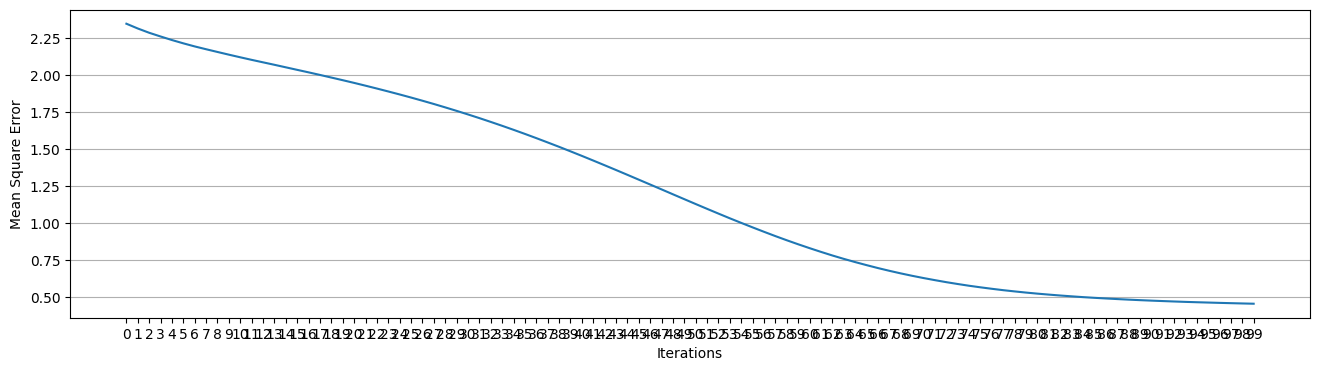

In [230]:
def train_and_plotb(R, K=2, alpha=0.1, gamma=0.01, iterations=100, bias=True, tp=0):
    lf = LF_b(R, K=K, alpha=alpha, gamma=gamma,
              iterations=iterations, bias=bias)
    training_process = lf.train(tp=tp)

    print("\nP x Q:")
    print(lf.full_matrix())
    print("\nGlobal bias:")
    print(lf.b)
    print()

    x = [x for x, y in training_process]
    y = [y for x, y in training_process]
    plt.figure(figsize=((16, 4)))
    plt.plot(x, y)
    plt.xticks(x, x)
    plt.xlabel("Iterations")
    plt.ylabel("Mean Square Error")
    plt.grid(axis="y")
    plt.show()


R = np.array([
    [5, 3, 0, 5],
    [4, 0, 0, 5],
    [1, 1, 0, 5]
])

train_and_plotb(R, K=2, alpha=0.02, gamma=0.01, iterations=100, bias=True)

$\color{red}{\text{Question-11:}}$ Download the netflix ratings matrix, and run your algorithm.

$\color{red}{\text{Answer:}}$ Put your MSE versus iterations here.


100%|██████████| 100836/100836 [00:00<00:00, 826532.81it/s]


610 193609
SGD Iteration: 10 ; error = 241.8884
SGD Iteration: 20 ; error = 224.2047
SGD Iteration: 30 ; error = 216.9754
SGD Iteration: 40 ; error = 213.3427
SGD Iteration: 50 ; error = 211.1538
SGD Iteration: 60 ; error = 209.7262
SGD Iteration: 70 ; error = 208.7170
SGD Iteration: 80 ; error = 207.8091
SGD Iteration: 90 ; error = 207.2245
SGD Iteration: 100 ; error = 206.7530

P x Q:
[[4.76724607 4.31633705 4.13478871 ... 4.3702609  4.36607593 4.80773503]
 [3.851065   3.84948505 3.34416419 ... 3.99166746 3.98656315 4.48167306]
 [1.68547851 2.18138126 0.69395208 ... 1.95161291 1.87093766 3.71670726]
 ...
 [3.24986491 2.88773128 2.66545559 ... 3.30228838 3.28143002 3.75580431]
 [3.543485   3.16607301 2.93358275 ... 3.31106496 3.27474599 3.68572728]
 [4.4368529  3.67864364 3.66077883 ... 3.60723094 3.63751958 4.23068876]]

Global bias:
[[4.78575256 4.29664051 4.12443771 ... 4.36637931 4.36637931 4.86482233]
 [4.36764911 3.87853706 3.70633426 ... 3.94827586 3.94827586 4.44671888]
 [2.85

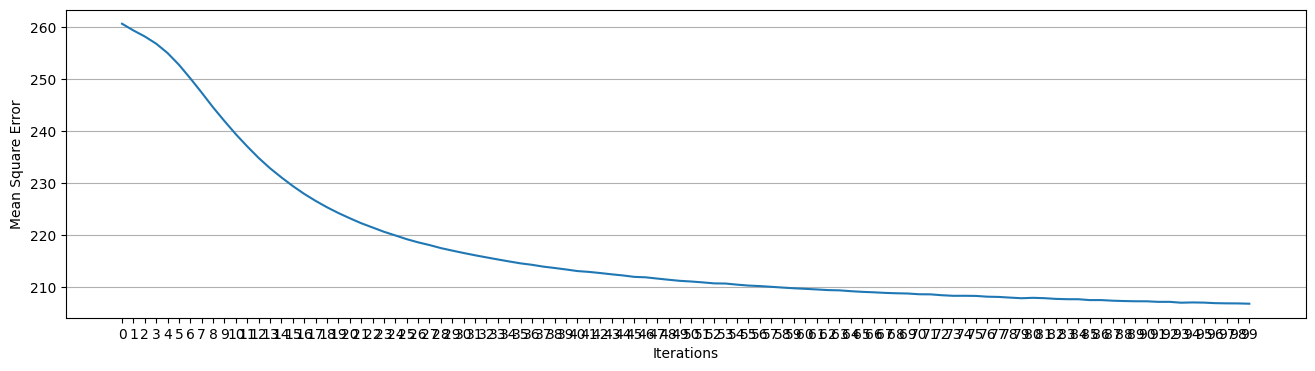

In [220]:
import csv
from tqdm import tqdm
dictReader = csv.DictReader(
    open('./ml-latest-small/ratings.csv', 'r', encoding='utf-8'))
ratings = list(dictReader)
maxUserID = -1
maxMovieID = -1

for rating in tqdm(ratings):
    maxUserID = max(maxUserID, int(rating['userId']))
    maxMovieID = max(maxMovieID, int(rating['movieId']))

R = np.zeros((maxUserID, maxMovieID))
for rating in tqdm(ratings):
    R[int(rating['userId'])-1][int(rating['movieId'])-1] = float(rating['rating'])

R.shape
train_and_plotb(R, K=4, alpha=0.02, gamma=0.01, iterations=100, bias=True)

## Thats All Folks! Further Readings or Infomation

https://www.coursera.org/learn/networks-illustrated/lecture/8GPZT/netflix-timeline


# Keep Recommending!
